In [1]:
import requests
import json
import pandas as pd
from utils.predictions import stats_by_intent, print_stats_by_intent



In [2]:
with open('data/predict.json', encoding="utf8") as f:
    predictions = json.load(f)
with open('data/predict2.json', encoding="utf8") as f:
    our_predictions = json.load(f)
with open('data/testing_set.json', encoding="utf8") as f:
    test_dataset = json.load(f)
with open('data/training_set.json', encoding="utf8") as f:
    training_dataset = json.load(f)

stats_intent = stats_by_intent(test_dataset, predictions)
our_stats_intent = stats_by_intent(test_dataset, our_predictions)

print_stats_by_intent(stats_intent)

sum_prec = 0
sum_rec = 0
for intent in stats_intent:
    sum_prec += stats_intent[intent]["precision"]
    sum_rec += stats_intent[intent]["recall"]
print("avg precision: ", (sum_prec/len(stats_intent)))
print("avg recall: ", (sum_rec/len(stats_intent)))

print_stats_by_intent(our_stats_intent)
sum_prec = 0
sum_rec = 0
for intent in our_stats_intent:
    sum_prec += our_stats_intent[intent]["precision"]
    sum_rec += our_stats_intent[intent]["recall"]
print("avg precision: ", (sum_prec/len(our_stats_intent)))
print("avg recall: ", (sum_rec/len(our_stats_intent)))

                      FP     TP  TP+FN  TP+FP  precision    recall
find-train           1.0   14.0   21.0   15.0   0.933333  0.666667
irrelevant         176.0  663.0  677.0  839.0   0.790226  0.979321
find-flight          1.0    7.0   24.0    8.0   0.875000  0.291667
find-restaurant      1.0   52.0   93.0   53.0   0.981132  0.559140
purchase            18.0   67.0  114.0   85.0   0.788235  0.587719
find-around-me       4.0   29.0   67.0   33.0   0.878788  0.432836
provide-showtimes    1.0    4.0   14.0    5.0   0.800000  0.285714
find-hotel           6.0   21.0   55.0   27.0   0.777778  0.381818
avg precision:  0.8530616024449811
avg recall:  0.5231101545888661
                     FP     TP  TP+FN  TP+FP  precision    recall
purchase           12.0   80.0  114.0   92.0   0.869565  0.701754
find-around-me     24.0   42.0   67.0   66.0   0.636364  0.626866
find-restaurant    11.0   75.0   93.0   86.0   0.872093  0.806452
irrelevant         80.0  632.0  677.0  712.0   0.887640  0.933530


In [3]:
import matplotlib.pyplot as plt
from utils.predictions import get_detected_intent
from utils.plot_utils import compute_scores, plot_confusion_matrix, compute_roc_auc_curve, Cleymevin_curve


y_pred = []
y_true = []
y_pred_all = []
lst_classe = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","irrelevant","provide-showtimes","purchase"]
lst_classe_bis = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","provide-showtimes","purchase"]
pas = 0.001
for i in range(len(test_dataset)):
    y_pred.append(get_detected_intent(predictions[i]))
    y_true.append(test_dataset[i]["intent"])
    y_pred_all.append(predictions[i])


compute_scores(y_pred,y_true,lst_classe)
plot_confusion_matrix(y_pred,y_true,lst_classe)
plt.figure()
compute_roc_auc_curve(lst_classe,pas,y_pred_all,y_true)
plt.figure()
Cleymevin_curve(lst_classe_bis,pas,y_pred_all,y_true)

Classe               Precision   Recall    F2Score
--------------------------------------------------
find-around-me   |   0.878788    0.432836  0.481728
find-flight      |   0.875000    0.291667  0.336538
find-hotel       |   0.777778    0.381818  0.425101
find-restaurant  |   0.981132    0.559140  0.611765
find-train       |   0.933333    0.666667  0.707071
irrelevant       |   0.790226    0.979321  0.934593
provide-showtimes|   0.800000    0.285714  0.327869
purchase         |   0.788235    0.587719  0.619224
Best threshold :0.0859453993933266
Best threshold :0.0859453993933266


Classe               Precision   Recall    F2Score
--------------------------------------------------
find-around-me   |   0.636364    0.626866  0.628743
find-flight      |   0.947368    0.750000  0.782609
find-hotel       |   0.725490    0.672727  0.682657
find-restaurant  |   0.872093    0.806452  0.818777
find-train       |   0.782609    0.857143  0.841121
irrelevant       |   0.887640    0.933530  0.923977
provide-showtimes|   0.750000    0.857143  0.833333
purchase         |   0.869565    0.701754  0.729927
Best threshold :0.1840242669362993
Best threshold :0.14357937310414562


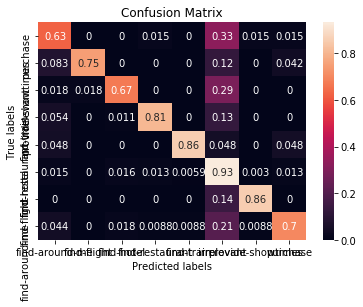

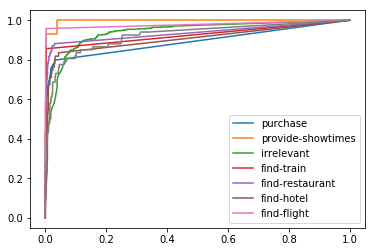

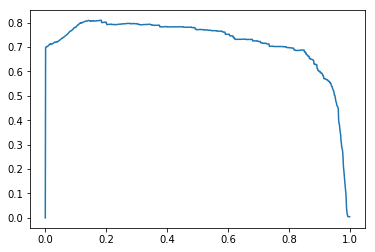

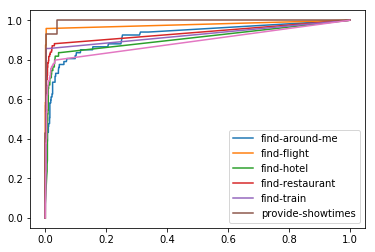

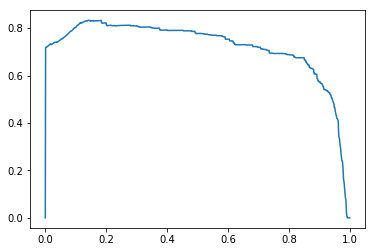

In [4]:
y_pred = []
y_true = []
y_pred_all = []
lst_classe = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","irrelevant","provide-showtimes","purchase"]
lst_classe_bis = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","provide-showtimes","purchase"]
pas = 0.001
for i in range(len(test_dataset)):
    y_pred.append(get_detected_intent(our_predictions[i]))
    y_true.append(test_dataset[i]["intent"])
    y_pred_all.append(our_predictions[i])


compute_scores(y_pred,y_true,lst_classe)
plot_confusion_matrix(y_pred,y_true,lst_classe)
plt.figure()
compute_roc_auc_curve(lst_classe,pas,y_pred_all,y_true)
plt.figure()
Cleymevin_curve(lst_classe_bis,pas,y_pred_all,y_true)